In [1]:
import wfdb
from wfdb import processing
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from ecgdetectors import Detectors
import scipy.signal as signal
import pandas as pd

In [2]:
record_name = 100

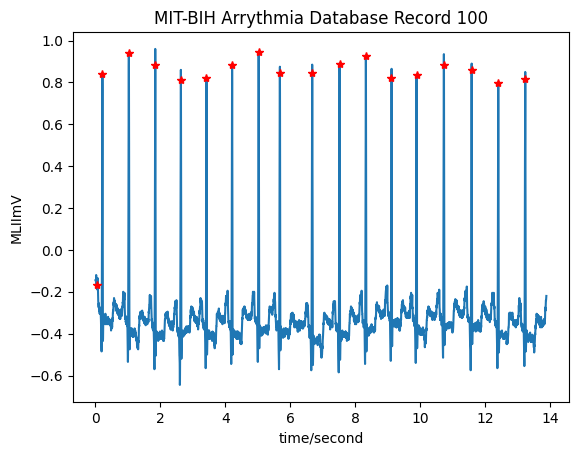

{'record_name': '100',
 'n_sig': 1,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 5000,
 'base_time': None,
 'base_date': None,
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'sig_name': ['MLII'],
 'p_signal': array([[-0.145],
        [-0.145],
        [-0.145],
        ...,
        [-0.235],
        [-0.225],
        [-0.22 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100.dat'],
 'fmt': ['212'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [200.0],
 'baseline': [1024],
 'units': ['mV'],
 'adc_res': [11],
 'adc_zero': [1024],
 'init_value': [995],
 'checksum': [15710],
 'block_size': [0]}

In [3]:
record = wfdb.rdrecord(f'D:\\Downloads\\mit-bih-arrhythmia-database-1.0.0\\{record_name}', channels=[0], sampto=5000)
annotation = wfdb.rdann(f'D:\\Downloads\\mit-bih-arrhythmia-database-1.0.0\\{record_name}', extension='atr', sampto=5000)

wfdb.plot_wfdb(record=record, annotation=annotation, title=f'MIT-BIH Arrythmia Database Record {record_name}', time_units='seconds')
display(record.__dict__)

In [4]:
filtered_ecg = nk.ecg_clean(ecg_signal=record.p_signal, sampling_rate=record.fs, method='neurokit')
filtered_ecg

array([ 0.04164229,  0.04210543,  0.04307893, ..., -0.02779237,
       -0.02630629, -0.02524298])

array([  77,  370,  663,  947, 1231, 1515, 1809, 2044, 2403, 2706, 2998,
       3283, 3560, 3863, 4170, 4466, 4765])

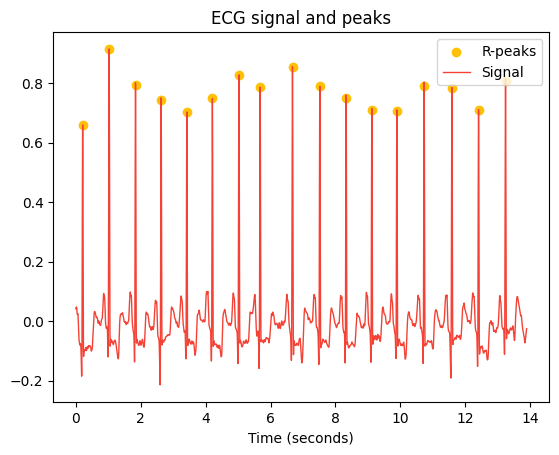

In [5]:
_, info_ecg = nk.ecg_peaks(ecg_cleaned=filtered_ecg, sampling_rate=record.fs, method='rodrigues2021', show=True)
r_peaks_ecg = info_ecg['ECG_R_Peaks']
r_peaks_ecg

17 reference annotations, 17 test annotations

True Positives (matched samples): 17
False Positives (unmatched test samples): 0
False Negatives (unmatched reference samples): 0

Sensitivity: 1.0000 (17/17)
Positive Predictivity: 1.0000 (17/17)


c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\wfdb\processing\evaluate.py:403: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


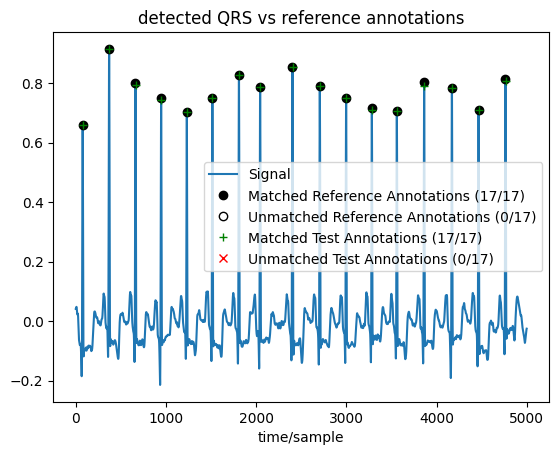

In [6]:
# # Run QRS detection on signal
# xqrs = processing.XQRS(sig=filtered_signal, fs=record.fs)
# xqrs.detect()
# Alternatively, use the gateway function to get the QRS indices directly
# qrs_inds = processing.xqrs_detect(sig=sig[:,0], fs=fields['fs'])

# Compare detected QRS complexes to reference annotation.
# Note, first sample in 100.atr is not a QRS.
comparitor = processing.compare_annotations(ref_sample=annotation.sample[1:],
                                            test_sample=r_peaks_ecg,
                                            window_width=int(0.1 * record.fs),
                                            signal=filtered_ecg)

# Print and plot the results
comparitor.print_summary()
comparitor.plot(title='detected QRS vs reference annotations')

In [7]:
r_peaks_ecg[1:-1]

array([ 370,  663,  947, 1231, 1515, 1809, 2044, 2403, 2706, 2998, 3283,
       3560, 3863, 4170, 4466])

In [8]:
classes = ['N', 'V', 'A', 'L', 'R', 'E', 'F', 'L', 'R', 'a', 'V', 'F', 'J']
input_size = 256
len(classes)

13

In [9]:
# peaks, _ = find_peaks(filtered_signal, distance=150)
# print(corrected_peak_inds)
# print(peaks)

csv_filename = 'C:\\Users\\Administrator\\Documents\\TA\\dataset_feature_extracted_example\\example.csv'

data_list = []

for peak in r_peaks_ecg[2:-1]:
    start, end = peak-input_size//2, peak+input_size//2

    ann = wfdb.rdann(f'D:\\Downloads\\mit-bih-arrhythmia-database-1.0.0\\{record_name}', extension='atr', sampfrom=start, sampto=end, return_label_elements=['symbol'])
    ann_symbol = ann.symbol

    if len(ann_symbol) == 1 and (ann_symbol[0] in classes) and (ann_symbol[0] != 'N' or np.random.random()<0.13):
        row_data = np.append(filtered_ecg[start:end], ann_symbol[0])
        data_list.append(row_data)
        
        print(row_data)
        print(len(filtered_ecg[start:end]))

# Save to CSV file
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    # Write data
    csv_writer.writerows(data_list)


['0.0008227597759963841' '-0.00027083379069769433'
 '-0.0011607340336761696' '-0.0022551005635999834'
 '-0.0029416848487608923' '-0.0032204832764233227'
 '-0.0028874106223272765' '-0.002452667397740055' '-0.0022223725026281923'
 '-0.002196522409439407' '-0.001966950346882297' '-0.0015336528306425545'
 '-0.0008966263981785496' '-0.0009742349557595278'
 '-0.0012562710030525396' '-0.0018447719597478878' '-0.002637693635039411'
 '-0.0032268694113881573' '-0.004326581673181706' '-0.0059368271129421465'
 '-0.007649439180388879' '-0.009464414613131704' '-0.010667464457157464'
 '-0.011156544679151054' '-0.011135733717589564' '-0.010400946768527897'
 '-0.009360343948933036' '-0.008013922133485285' '-0.006565759852601571'
 '-0.005424017292497172' '-0.0044866505809593' '-0.00405977913434273'
 '-0.004347481575991575' '-0.004941591654658616' '-0.005740065591493602'
 '-0.0064367779984576805' '-0.006827644327347597' '-0.007116743318817439'
 '-0.007610194553438718' '-0.00769575028847227' '-0.007475448

In [10]:
df = pd.read_csv(f'C:\\Users\\Administrator\\Documents\\TA\\dataset_feature_extracted_example\\example.csv')

unique_labels = df.iloc[:, -1].unique()
print(unique_labels)

['A' 'N']


In [11]:
df.head()

,0.0008227597759963841,-0.00027083379069769433,-0.0011607340336761696,-0.0022551005635999834,-0.0029416848487608923,-0.0032204832764233227,-0.0028874106223272765,-0.002452667397740055,-0.0022223725026281923,-0.002196522409439407,...,0.03056242095521018,0.03034968681699174,0.0297287168022982,0.02900563348193053,0.02787431453241626,0.02674292334836788,0.026019623328308917,0.025194210527845286,0.024164644272018598,N
0,-0.062319,-0.059507,-0.055369,-0.050107,-0.044334,-0.037541,-0.030032,-0.021605,-0.013381,-0.005258,...,-0.001528,0.002979,0.007689,0.012196,0.016498,0.020188,0.022654,0.024098,0.024624,A
1,-0.004262,-0.005638,-0.007320,-0.009103,-0.011498,-0.014096,-0.016081,-0.017658,-0.018825,-0.019890,...,0.044784,0.046306,0.047114,0.047412,0.047200,0.046681,0.045959,0.044931,0.042985,N


In [12]:
import os

folder_path = 'C:\\Users\\Administrator\\Documents\\TA\\dataset_feature_extracted_example'

all_files = os.listdir(folder_path)

csv_files = [f for f in all_files if f.endswith('.csv')]

df_list = []

for csv in csv_files:
    file_path = os.path.join(folder_path, csv)
    try:
        # Try reading the file using default UTF-8 encoding
        df = pd.read_csv(file_path)
        df_list.append(df)
    except UnicodeDecodeError:
        try:
            # If UTF-8 fails, try reading the file using UTF-16 encoding with tab separator
            df = pd.read_csv(file_path, sep='\t', encoding='utf-16')
            df_list.append(df)
        except Exception as e:
            print(f"Could not read file {csv} because of error: {e}")
    except Exception as e:
        print(f"Could not read file {csv} because of error: {e}")

# Concatenate all data into one DataFrame
big_df = pd.concat(df_list, ignore_index=True)

# Save the final result to a new CSV file
big_df.to_csv(os.path.join(folder_path, 'merge_all_records.csv'), index=False)
# file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# df_append = pd.DataFrame()

# for file in file_list:
#     df_temp = pd.read_csv(file)
#     df_append = df_append.append()
# dfs_to_concat = []

# for file in file_list:
#     df_temp = pd.read_csv(file)
#     dfs_to_concat.append(df_temp)

# df_append = pd.concat(dfs_to_concat, ignore_index=True)

# df_append.to_csv('C:\\Users\\Administrator\\Documents\\TA\\dataset_feature_extracted_example\\merge_all_records.csv')
# df_append.head()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12152\2309195930.py:15: DtypeWarning: Columns (256) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
